# The Wisconsin breast cancer dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML, Image

%matplotlib inline

scikit-learn has a few datasets included as part of the package. The wisconsin breat cancer dataset is one of them - we can load it as follows.

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

And it comes in dictionary form:

In [3]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
print('We have ' +  str(len(cancer['target'])) + ' instances in total.')
print(str(sum(cancer['target'])) + ' are benign instances.')
print(str(569 - sum(cancer['target'])) + ' are malignant.')
print(str(round(357 / 569, 2)) + '% of our instances are benign while ' + str(round(212 / 569, 2)) + '% are malignant.')

We have 569 instances in total.
357 are benign instances.
212 are malignant.
0.63% of our instances are benign while 0.37% are malignant.


In [5]:
print(cancer['DESCR'])

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [6]:
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

In [7]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


We perform the standard pre-processing below, and import the libraries we will be needing below that.

In [8]:
X = df.values
y = cancer['target']

In [9]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/kw9R0nD69OU" frameborder="0" allowfullscreen></iframe>')

Explained variance percentage with 1 principal components: 0.9820446715
Explained variance percentage with 2 principal components: 0.9982211614
Explained variance percentage with 3 principal components: 0.9997786721
Explained variance percentage with 4 principal components: 0.9998996041
Explained variance percentage with 5 principal components: 0.9999878765
Explained variance percentage with 6 principal components: 0.9999945254


Text(0,0.5,'Explained variance')

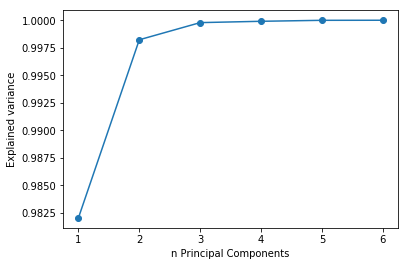

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(X)

n = 1
for i in np.cumsum(pca.explained_variance_ratio_):
    print('Explained variance percentage with ' + str(n) + ' principal components: ' + str(round(i, 10)))
    n += 1
    
plt.plot(range(1, 7), np.cumsum(pca.explained_variance_ratio_), '-o')
plt.xlabel('n Principal Components')
plt.ylabel('Explained variance')

In [11]:
pca = PCA(n_components=3)
X = pca.fit_transform(X)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

## K-fold cross validation

K-fold cross validation is a great hack for testing out our classifiers which (in a way) enables us to make use 100% of our data for training. It works as illustrated in the following image.

<img src="https://www.researchgate.net/profile/Juan_Buhagiar2/publication/322509110/figure/fig1/AS:583173118664704@1516050714606/An-example-of-a-10-fold-cross-validation-cro17.png">

## Performance metrics

In this dataset (as shown above), we have considerably more benign tumours in our dataset than malignant ones.

Now, imagine we were building a classifier that screened for a rare disease - one that only 0.0001% of the general population had. Then if we had a classifier that just classified everyone as free of this disease, it would be 99.9999% accurate - even though it is commpletely bogus!

This is why we use different performance metrics. Accuracy is one such metric that has its uses - other well-known performance metrics include the ROC AUC score and the F1/Fbeta score.

In [14]:
from sklearn.metrics import accuracy_score, fbeta_score, make_scorer # make_scorer is needed in k-fold CV
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

C:\Users\s1895125\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [15]:
scorer = make_scorer(fbeta_score, beta=2)

K-fold CV score for 1 neighbors: 0.9395736582568623
K-fold CV score for 2 neighbors: 0.9159055157096929
K-fold CV score for 3 neighbors: 0.9427014259539919
K-fold CV score for 4 neighbors: 0.9368342379381099
K-fold CV score for 5 neighbors: 0.9544251123545079
K-fold CV score for 6 neighbors: 0.9496000524096935
K-fold CV score for 7 neighbors: 0.9577067018540966
K-fold CV score for 8 neighbors: 0.9555231871423506
K-fold CV score for 9 neighbors: 0.9578209783886473
K-fold CV score for 10 neighbors: 0.9569598916635786
K-fold CV score for 11 neighbors: 0.960986032139834
K-fold CV score for 12 neighbors: 0.9616310269798752
K-fold CV score for 13 neighbors: 0.9623921529007935
K-fold CV score for 14 neighbors: 0.9577739682236721
K-fold CV score for 15 neighbors: 0.9612258809540337
K-fold CV score for 16 neighbors: 0.9630832532392448
K-fold CV score for 17 neighbors: 0.9605848553130081
K-fold CV score for 18 neighbors: 0.9618179110046625
K-fold CV score for 19 neighbors: 0.9593803803824186
K-f

Text(0,0.5,'K-fold CV score')

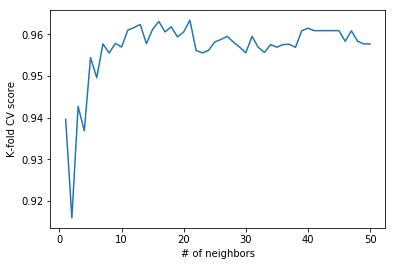

In [16]:
scores = []

for n in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score = np.mean(cross_val_score(estimator=knn, X=X_train, y=y_train, cv=10, scoring=scorer))
    scores.append(score)
    print('K-fold CV score for ' + str(n) + ' neighbors: ' + str(score))
    
print('\nHighest CV score: ' + str(max(scores)) + ' with ' + str(scores.index(max(scores)) + 1) + ' neighbors')
    
plt.plot(range(1, 51), scores)
plt.xlabel('# of neighbors')
plt.ylabel('K-fold CV score')

Our highest score is with 16 neighbors - but we notice that our F3 score drops rapidly after that, so to be on the safe side it would probably be best to set our K a little lower than that, say 13.

K-fold CV score for 1 estimators: 0.8928799540826885
K-fold CV score for 2 estimators: 0.8517415986104252
K-fold CV score for 3 estimators: 0.9354412619548842
K-fold CV score for 4 estimators: 0.91889907905763
K-fold CV score for 5 estimators: 0.9486120469663251
K-fold CV score for 6 estimators: 0.9364534766041517
K-fold CV score for 7 estimators: 0.9526659810244411
K-fold CV score for 8 estimators: 0.9432756288790705
K-fold CV score for 9 estimators: 0.9504848915677566
K-fold CV score for 10 estimators: 0.9437496396940329
K-fold CV score for 11 estimators: 0.9446197889284604
K-fold CV score for 12 estimators: 0.9425642383587627
K-fold CV score for 13 estimators: 0.9498852224197005
K-fold CV score for 14 estimators: 0.9425642383587627
K-fold CV score for 15 estimators: 0.9478637775292696
K-fold CV score for 16 estimators: 0.9452035345464461
K-fold CV score for 17 estimators: 0.9504611801266722
K-fold CV score for 18 estimators: 0.9457690980152353
K-fold CV score for 19 estimators: 0.94

Text(0,0.5,'K-fold CV score')

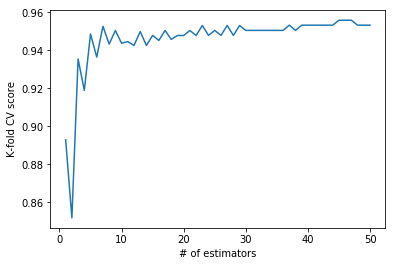

In [17]:
scores = []

for n in range(1, 51):
    rfc = RandomForestClassifier(random_state=1, n_estimators=n)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    score = np.mean(cross_val_score(estimator=rfc, X=X_train, y=y_train, cv=10, scoring=scorer))
    scores.append(score)
    print('K-fold CV score for ' + str(n) + ' estimators: ' + str(score))
    
print('\nHighest CV score: ' + str(max(scores)) + ' with ' + str(scores.index(max(scores)) + 1) + ' estimators')
    
plt.plot(range(1, 51), scores)
plt.xlabel('# of estimators')
plt.ylabel('K-fold CV score')

With a similar argument to previously, I would suggest 20 estimators, but a case could be made for others, e.g. our high-scorer, 4.

K-fold CV score for 1 estimators: 0.8971496112493389
K-fold CV score for 2 estimators: 0.8971496112493389
K-fold CV score for 3 estimators: 0.9579922251335786
K-fold CV score for 4 estimators: 0.9491121905187004
K-fold CV score for 5 estimators: 0.9509633051683821
K-fold CV score for 6 estimators: 0.9515961648776748
K-fold CV score for 7 estimators: 0.9515961648776748
K-fold CV score for 8 estimators: 0.9515961648776748
K-fold CV score for 9 estimators: 0.9533850747490552
K-fold CV score for 10 estimators: 0.9546297387371527
K-fold CV score for 11 estimators: 0.9546297387371527
K-fold CV score for 12 estimators: 0.9558133352203326
K-fold CV score for 13 estimators: 0.958528567008412
K-fold CV score for 14 estimators: 0.9558480022252022
K-fold CV score for 15 estimators: 0.9558585781805228
K-fold CV score for 16 estimators: 0.9558585781805228
K-fold CV score for 17 estimators: 0.9558585781805228
K-fold CV score for 18 estimators: 0.9512730307259893
K-fold CV score for 19 estimators: 0.9

Text(0,0.5,'K-fold CV score')

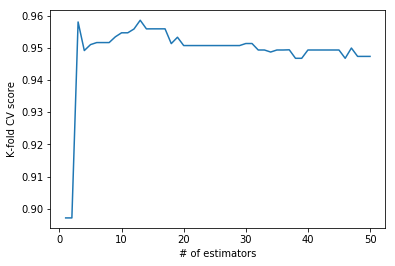

In [18]:
scores = []

for n in range(1, 51):
    gbc = GradientBoostingClassifier(random_state=1, n_estimators=n)
    gbc.fit(X_train, y_train)
    y_pred = gbc.predict(X_test)
    score = np.mean(cross_val_score(estimator=gbc, X=X_train, y=y_train, cv=10, scoring=scorer))
    scores.append(score)
    print('K-fold CV score for ' + str(n) + ' estimators: ' + str(score))
    
print('\nHighest CV score: ' + str(max(scores)) + ' with ' + str(scores.index(max(scores)) + 1) + ' estimators')
    
plt.plot(range(1, 51), scores)
plt.xlabel('# of estimators')
plt.ylabel('K-fold CV score')

Since the Multi-Layer Preseptron classifier uses a few important parameters, it might be a better idea to use grid search rather than plottig our results.

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
parameter_grid = {'alpha': [0.001, 0.01, 0.05, 0.1], 'hidden_layer_sizes': [(100,), (100, 50), (120,), (120, 50)]}

In [21]:
mlp = MLPClassifier(random_state=1)
gs = GridSearchCV(mlp, param_grid=parameter_grid, cv=10, verbose=1)
gs.fit(X_train, y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    9.4s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.001, 0.01, 0.05, 0.1], 'hidden_layer_sizes': [(100,), (100, 50), (120,), (120, 50)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [22]:
mlp = MLPClassifier(random_state=1, alpha=0.0001, hidden_layer_sizes=(100,))

print(np.mean(cross_val_score(estimator=mlp, X=X_train, y=y_train, cv=10, scoring=scorer)))

0.9715902524331849


Now that we have decided our tuning parameters, we can set them - and then use the majority voting classifier to come up with an even better classifier:

In [48]:
knn = KNeighborsClassifier(n_neighbors=20)
rfc = RandomForestClassifier(random_state=1, n_estimators=45)
gbc = GradientBoostingClassifier(random_state=1, n_estimators=13)
mlp = MLPClassifier(random_state=1, alpha=0.0001, hidden_layer_sizes=(100,))

classifiers = [knn, rfc, gbc, mlp]

for c in classifiers:
    c.fit(X_train, y_train)

In [24]:
import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [49]:
from sklearn.ensemble import VotingClassifier
classifier_tuples = [('KNN', knn), ('RFC', rfc), ('GBC', gbc), ('MLP', mlp)]
vot = VotingClassifier(estimators=classifier_tuples, weights=[1, 1, 1, 1])

print(np.mean(cross_val_score(estimator=vot, X=X_train, y=y_train, cv=10, scoring=scorer)))

0.9550899572417035


In [50]:
for classifier in [knn, rfc, gbc, mlp, vot]:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print('Accuracy score: ' + str(accuracy_score(y_pred, y_test)))
    print('F3 score: ' + str(fbeta_score(y_pred, y_test, beta=2)))
    print(' ')

Accuracy score: 0.9534883720930233
F3 score: 0.9496124031007752
 
Accuracy score: 0.9418604651162791
F3 score: 0.935114503816794
 
Accuracy score: 0.9418604651162791
F3 score: 0.9448818897637795
 
Accuracy score: 0.9302325581395349
F3 score: 0.9302325581395349
 
Accuracy score: 0.9534883720930233
F3 score: 0.9496124031007752
 


Let's look at confusion matrices to help us break down the output of the classifiers:

In [56]:
import itertools 
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

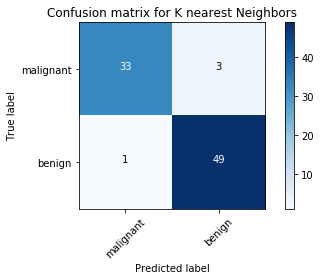

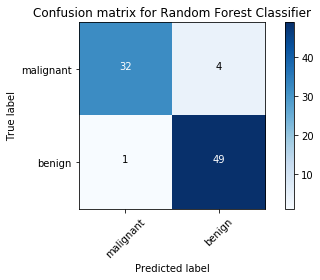

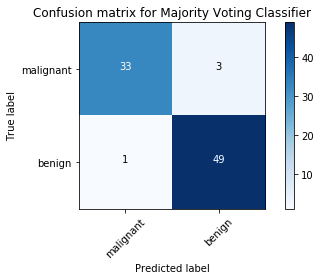

In [57]:
y_pred = knn.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=['malignant', 'benign'], title='Confusion matrix for K nearest Neighbors')
plt.show()

y_pred = rfc.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=['malignant', 'benign'], title='Confusion matrix for Random Forest Classifier')
plt.show()

y_pred = vot.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=['malignant', 'benign'], title='Confusion matrix for Majority Voting Classifier')
plt.show()

We can plot our data in 2 dimensions to get a feel for how separable the dataset is, to help us judge whether our algorithms are doing a much better job than a human could do.

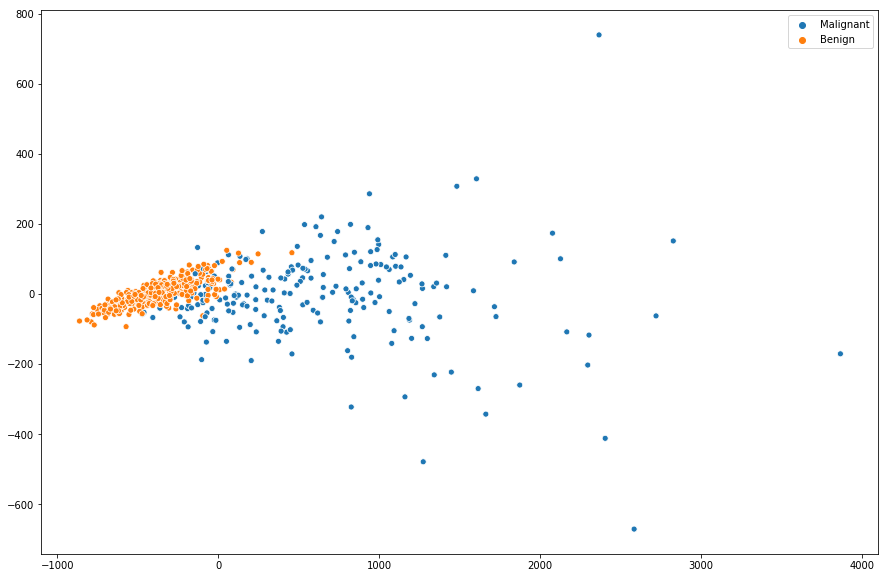

In [54]:
pca = PCA(n_components=2)
X = pca.fit_transform(df.values[:, :])
fig, ax = plt.subplots(figsize=(15, 10))
hue = [['Malignant', 'Benign'][x == 1] for x in y]

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=hue)